In [36]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [37]:
# Load FAOSTAT_data_en_1-1-2023.csv file into dataframe (df)
df = pd.read_csv('FAOSTAT_data_en_1-1-2023.csv',encoding_errors='ignore')

In [38]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1961,1961,tonnes,38049.0,A,Official figure
1,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1962,1962,tonnes,38885.0,A,Official figure
2,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1963,1963,tonnes,40251.0,A,Official figure
3,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1964,1964,tonnes,41566.0,A,Official figure
4,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1965,1965,tonnes,44665.0,A,Official figure


In [39]:
df.shape

(5094, 14)

In [40]:
df.describe()

,Area Code (M49),Element Code,Item Code (CPC),Year Code,Year,Value
count,5094.000000,5094.0,5094.000000,5094.000000,5094.000000,5.094000e+03
mean,340.773459,5510.0,22199.875848,1991.940518,1991.940518,5.184677e+05
std,203.937479,0.0,656.142846,17.358901,17.358901,2.049375e+06
min,40.000000,5510.0,21521.000000,1961.000000,1961.000000,0.000000e+00
25%,250.000000,5510.0,22120.000000,1977.000000,1977.000000,9.600000e+03
50%,276.000000,5510.0,22221.010000,1993.000000,1993.000000,3.945116e+04
75%,380.000000,5510.0,22251.010000,2007.000000,2007.000000,1.708600e+05
max,724.000000,5510.0,26110.000000,2020.000000,2020.000000,2.081474e+07


In [41]:
df.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

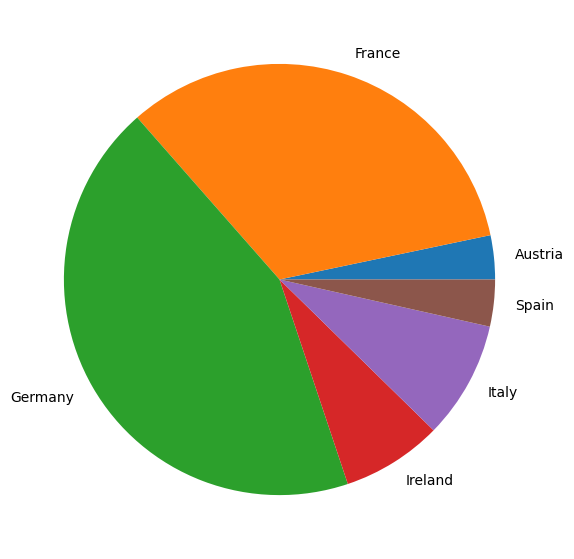

In [42]:
# Creating dataset
data = []
 
for Area in df["Area"].unique():
    data.append(df[df['Area'] == Area]["Value"].sum() )

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = df["Area"].unique())
 
# show plot
plt.show()  

In [43]:
df["Domain"].unique()


array(['Crops and livestock products'], dtype=object)

In [44]:
df[df['Value'] == 0.0].head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
618,QCL,Crops and livestock products,40,Austria,5510,Production,22130.02,"Whey, dry",1990,1990,tonnes,0.0,I,Imputed value
619,QCL,Crops and livestock products,40,Austria,5510,Production,22130.02,"Whey, dry",1991,1991,tonnes,0.0,I,Imputed value
620,QCL,Crops and livestock products,40,Austria,5510,Production,22130.02,"Whey, dry",1992,1992,tonnes,0.0,I,Imputed value
621,QCL,Crops and livestock products,40,Austria,5510,Production,22130.02,"Whey, dry",1993,1993,tonnes,0.0,I,Imputed value
622,QCL,Crops and livestock products,40,Austria,5510,Production,22130.02,"Whey, dry",1994,1994,tonnes,0.0,I,Imputed value


In [45]:
df["Flag"].unique()


array(['A', 'T', 'I', 'E', 'M'], dtype=object)

In [46]:
df["Flag Description"].unique()


array(['Official figure', 'Unofficial figure', 'Imputed value',
       'Estimated value',
       'Missing value (data cannot exist, not applicable)'], dtype=object)

In [47]:
df[df['Flag Description'] == "Missing value (data cannot exist, not applicable)"].head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
1260,QCL,Crops and livestock products,250,France,5510,Production,26110.0,Raw silk (not thrown),2010,2010,tonnes,0.0,M,"Missing value (data cannot exist, not applicable)"
1261,QCL,Crops and livestock products,250,France,5510,Production,26110.0,Raw silk (not thrown),2011,2011,tonnes,0.0,M,"Missing value (data cannot exist, not applicable)"
1262,QCL,Crops and livestock products,250,France,5510,Production,26110.0,Raw silk (not thrown),2012,2012,tonnes,0.0,M,"Missing value (data cannot exist, not applicable)"
1263,QCL,Crops and livestock products,250,France,5510,Production,26110.0,Raw silk (not thrown),2013,2013,tonnes,0.0,M,"Missing value (data cannot exist, not applicable)"
1264,QCL,Crops and livestock products,250,France,5510,Production,26110.0,Raw silk (not thrown),2014,2014,tonnes,0.0,M,"Missing value (data cannot exist, not applicable)"


In [48]:
# removing values for "Missing value (data cannot exist, not applicable)"
df = df[df['Flag Description'] != "Missing value (data cannot exist, not applicable)"]

In [49]:
df["Flag Description"].unique()

array(['Official figure', 'Unofficial figure', 'Imputed value',
       'Estimated value'], dtype=object)

In [50]:
item = df["Item"].unique()
print(item)

['Butter of cow milk' 'Buttermilk, dry'
 'Cheese from milk of goats, fresh or processed'
 'Cheese from milk of sheep, fresh or processed'
 'Cheese from skimmed cow milk' 'Cheese from whole cow milk'
 'Cream, fresh' 'Pig fat, rendered' 'Skim milk and whey powder'
 'Skim milk of cows' 'Tallow' 'Whey, condensed' 'Whey, dry'
 'Whole milk powder' 'Whole milk, condensed' 'Whole milk, evaporated'
 'Yoghurt' 'Raw silk (not thrown)' 'Skim milk, evaporated'
 'Cheese from milk of buffalo, fresh or processed' 'Skim milk, condensed']


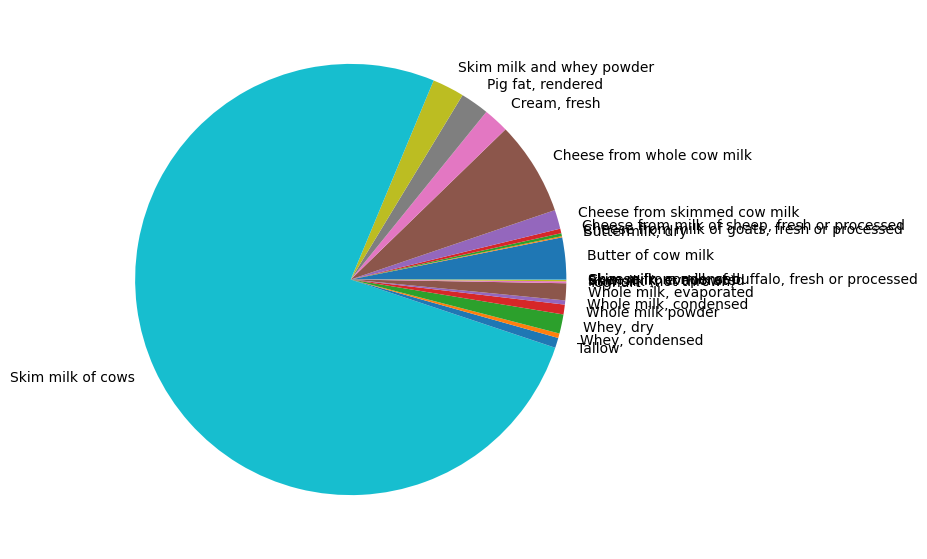

In [51]:
# Creating dataset
data = []
 
for item in df["Item"].unique():
    data.append(df[df['Item'] == item]["Value"].sum() )

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = df["Item"].unique())
 
# show plot
plt.show()  

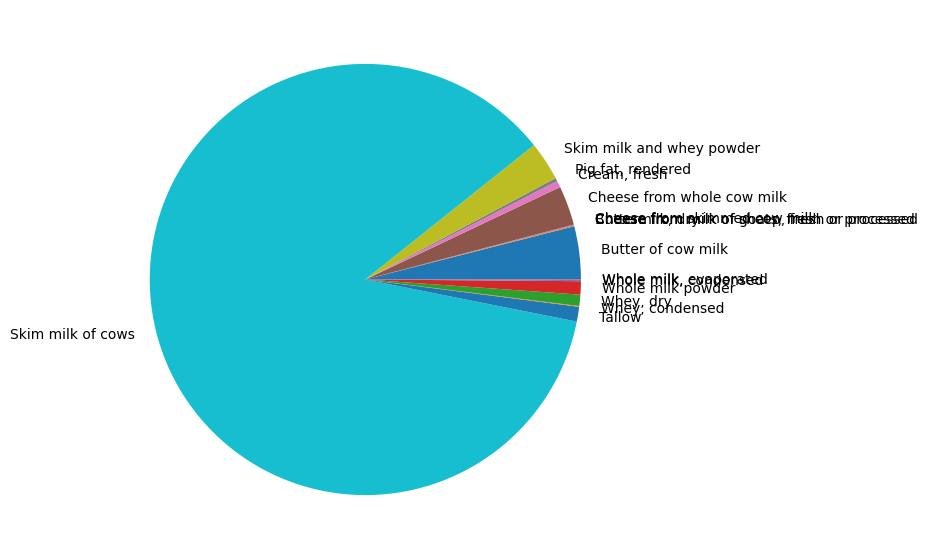

In [52]:
# Creating dataset
data = []

df2 = df[df['Area'] == "Ireland"]
for item in df2["Item"].unique():
    data.append(df2[df2['Item'] == item]["Value"].sum() )

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = df2["Item"].unique())
 
# show plot
plt.show()  

# Preparing data for Time series analysis 

In [53]:
df_ireland = df[df['Area'] == "Ireland"]

In [54]:
df_skim_milk_of_cows_europe = df[df['Item'] == "Skim milk of cows"]
df_skim_milk_of_cows_ireland = df_ireland[df_ireland['Item'] == "Skim milk of cows"]

In [55]:
df_skim_milk_of_cows_ireland.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
3010,QCL,Crops and livestock products,372,Ireland,5510,Production,22110.02,Skim milk of cows,1961,1961,tonnes,1423066.0,I,Imputed value
3011,QCL,Crops and livestock products,372,Ireland,5510,Production,22110.02,Skim milk of cows,1962,1962,tonnes,1455214.0,I,Imputed value
3012,QCL,Crops and livestock products,372,Ireland,5510,Production,22110.02,Skim milk of cows,1963,1963,tonnes,1402856.0,I,Imputed value
3013,QCL,Crops and livestock products,372,Ireland,5510,Production,22110.02,Skim milk of cows,1964,1964,tonnes,1480782.0,I,Imputed value
3014,QCL,Crops and livestock products,372,Ireland,5510,Production,22110.02,Skim milk of cows,1965,1965,tonnes,1501086.0,I,Imputed value


In [56]:
df_skim_milk_of_cows_europe.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
487,QCL,Crops and livestock products,40,Austria,5510,Production,22110.02,Skim milk of cows,1961,1961,tonnes,1135648.0,I,Imputed value
488,QCL,Crops and livestock products,40,Austria,5510,Production,22110.02,Skim milk of cows,1962,1962,tonnes,1151012.0,I,Imputed value
489,QCL,Crops and livestock products,40,Austria,5510,Production,22110.02,Skim milk of cows,1963,1963,tonnes,1154600.0,I,Imputed value
490,QCL,Crops and livestock products,40,Austria,5510,Production,22110.02,Skim milk of cows,1964,1964,tonnes,1143560.0,I,Imputed value
491,QCL,Crops and livestock products,40,Austria,5510,Production,22110.02,Skim milk of cows,1965,1965,tonnes,1139880.0,I,Imputed value


In [57]:
df_skim_milk_of_cows_ireland["Year"].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

In [58]:
years = df_skim_milk_of_cows_ireland["Year"].unique()
years.sort()
values = []

for year in years:
    dfx = df_skim_milk_of_cows_ireland[df_skim_milk_of_cows_ireland['Year'] == year] 
    value = dfx["Value"].sum()
    values.append(value)
                  
data = {
  "Year": years,
  "Value": values
}
df3 = pd.DataFrame(data)


In [59]:
years = df_skim_milk_of_cows_europe["Year"].unique()
years.sort()
values = []

for year in years:
    dfx = df_skim_milk_of_cows_europe[df_skim_milk_of_cows_europe['Year'] == year] 
    value = dfx["Value"].sum()
    values.append(value)
                  
data = {
  "Year": years,
  "Value": values
}
df4 = pd.DataFrame(data)

In [60]:
df3.to_csv('TimeSeries_skim_milk_of_cows_ireland.csv')
df4.to_csv('TimeSeries_skim_milk_of_cows_europe.csv')

# Preparing data for ANOVA

In [61]:
areas = df_skim_milk_of_cows_europe["Area"].unique()
areas.sort()
values = []
areasdata = []

for area in areas:
    dfx = df_skim_milk_of_cows_europe[df_skim_milk_of_cows_europe['Area'] == area] 
    for value in dfx["Value"].unique():
        values.append(value)
        areasdata.append(area)
                  
data = {
  "Area": areasdata,
  "Value": values
}
df5 = pd.DataFrame(data)

In [62]:
df5.groupby('Area').size()


Area
Austria    60
France     60
Germany    58
Ireland    60
Italy      58
Spain      60
dtype: int64

In [63]:
df5.to_csv('ANOVA_skim_milk_of_cows_europe.csv')